## Import libraries

In [1]:
import gym
import numpy as np
import random
import time

# Q-learning

In [2]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# SARSA (State-Action-Reward-State-Action)

In [3]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        for step in range(num_steps_per_episode):
            # state: s, action: a, reward: r, gamma: y, next_state: s' , next_action: a',
            next_state, reward, done, info = env.step(action)
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action = next_action
            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

# Install Package, hyperparemeter setup , play function and play_multiple_times function

In [4]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1

In [5]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
display = Display(visible=0, size=(720, 480))
display.start()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [7]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.5)

        state = next_state

    return (total_reward, steps)

In [8]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

# Frozenlake-v1

## Q-Learning

In [ ]:
env = gym.make('FrozenLake-v1')

In [ ]:
q_table_flv1, rewards_all_flv1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table_flv1

array([[0.49676768, 0.48612584, 0.48489093, 0.48597788],
       [0.28574751, 0.20986707, 0.33004668, 0.47180439],
       [0.40450324, 0.42262327, 0.40223568, 0.45239966],
       [0.3862873 , 0.18753312, 0.20929533, 0.43779144],
       [0.51545008, 0.38930116, 0.40512056, 0.38208649],
       [0.        , 0.        , 0.        , 0.        ],
       [0.28708513, 0.18447821, 0.17711887, 0.16481347],
       [0.        , 0.        , 0.        , 0.        ],
       [0.47347973, 0.31648522, 0.39835087, 0.56839116],
       [0.29444937, 0.58298323, 0.45898314, 0.45448841],
       [0.46952717, 0.44600177, 0.39202738, 0.39693704],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.54364143, 0.51994258, 0.76312115, 0.41846584],
       [0.74936303, 0.91583032, 0.72216727, 0.73501695],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
play_multiple_times(env, q_table_flv1, 1000)

Number of successes: 753/1000
Average number of steps: 39.53120849933599


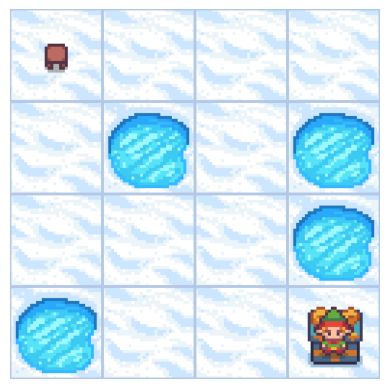

(1.0, 35)

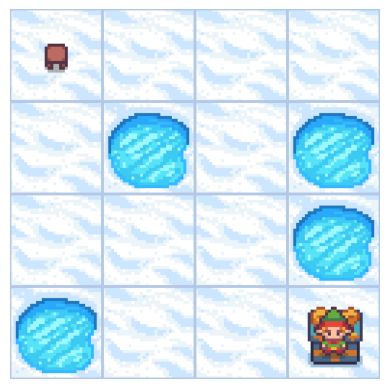

In [ ]:
play(env, q_table_flv1, render=True)

In [ ]:
window = 100
average_y_flv1 = []
for ind in range(len(rewards_all_flv1) - window + 1):
    average_y_flv1.append(np.mean(rewards_all_flv1[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_flv1.insert(0, np.nan)

## SARSA

In [ ]:
env = gym.make('FrozenLake-v1')

In [ ]:
sarsa_table_flv1, sarsa_rewards_all_flv1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
sarsa_table_flv1

array([[0.47724451, 0.4532966 , 0.45932969, 0.46129851],
       [0.24287776, 0.1890879 , 0.15344338, 0.41544929],
       [0.35602223, 0.22013444, 0.20452662, 0.23657838],
       [0.11234573, 0.        , 0.        , 0.        ],
       [0.48960915, 0.31783313, 0.36998023, 0.302925  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.27153391, 0.06334989, 0.15123307, 0.11755254],
       [0.        , 0.        , 0.        , 0.        ],
       [0.31283271, 0.46824145, 0.41408525, 0.49842105],
       [0.38502147, 0.54258169, 0.44093717, 0.35199581],
       [0.55164585, 0.37381097, 0.29691598, 0.19433164],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.47644105, 0.37763928, 0.67856411, 0.47654113],
       [0.72030479, 0.87897714, 0.76286657, 0.73622315],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
play_multiple_times(env, sarsa_table_flv1, 1000)

Number of successes: 745/1000
Average number of steps: 38.43892617449664


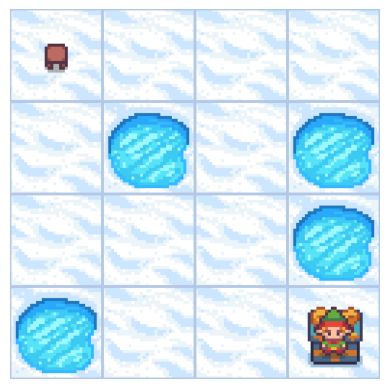

(1.0, 24)

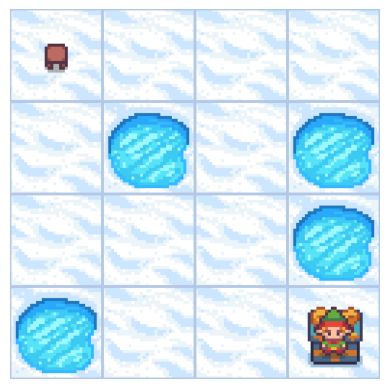

In [ ]:
play(env, sarsa_table_flv1, render=True)

In [ ]:
window = 100
sarsa_average_y_flv1 = []
for ind in range(len(sarsa_rewards_all_flv1) - window + 1):
    sarsa_average_y_flv1.append(np.mean(sarsa_rewards_all_flv1[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    sarsa_average_y_flv1.insert(0, np.nan)

# Frozenlake8x8-v1

## Q-LEARNING

In [ ]:
env1 = gym.make('FrozenLake8x8-v1')
q_table_fl8v1, rewards_all_fl8v1 = q_learning(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
q_table_fl8v1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [ ]:
play_multiple_times(env1, q_table_fl8v1, 1000)

Number of successes: 0/1000
Average number of steps: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Because the number of successes is 0 so we do not need to run play function
# play(env1, q_table_fl8v1, render=True)

In [ ]:
window = 100
average_y_fl8v1 = []
for ind in range(len(rewards_all_fl8v1) - window + 1):
    average_y_fl8v1.append(np.mean(rewards_all_fl8v1[ind:ind+window]))

for ind in range(window - 1):
    average_y_fl8v1.insert(0, np.nan)

## SARSA

In [ ]:
env1 = gym.make('FrozenLake8x8-v1')
sarsa_table_fl8v1, sarsa_rewards_all_fl8v1 = sarsa(env1, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [ ]:
sarsa_table_fl8v1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


In [ ]:
play_multiple_times(env1, sarsa_table_fl8v1, 1000)

Number of successes: 0/1000
Average number of steps: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# Because the number of successes is 0 so we do not need to run play function
# play(env1, q_table_fl8v1, render=True)

In [ ]:
window = 100
sarsa_average_y_fl8v1 = []
for ind in range(len(sarsa_rewards_all_fl8v1) - window + 1):
    sarsa_average_y_fl8v1.append(np.mean(sarsa_rewards_all_fl8v1[ind:ind+window]))

for ind in range(window - 1):
    sarsa_average_y_fl8v1.insert(0, np.nan)

# Taxi-v3

## Q-LEARNING

In [9]:
env2 = gym.make('Taxi-v3')
q_table_tv3, rewards_all_tv3 = q_learning(env2, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [10]:
q_table_tv3

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.69489497,  1.9988499 , -0.91603885, -1.47042842,  9.6220697 ,
        -3.51406166],
       [ 5.07163345,  2.94394907,  0.87782988,  3.97546222, 14.11880599,
        -3.63868993],
       ...,
       [-1.46478413, -1.04587935, -1.48534659, -1.42598844, -2.7297901 ,
        -1.91881   ],
       [-2.56129703, -2.56124086, -2.60405889, -1.2185534 , -2.86645234,
        -3.65171707],
       [-0.19      , -0.19      , -0.1999    , 14.89310437, -1.9099    ,
        -1.        ]])

In [11]:
play_multiple_times(env2, q_table_tv3, 1000)

Number of successes: 1000/1000
Average number of steps: 13.105


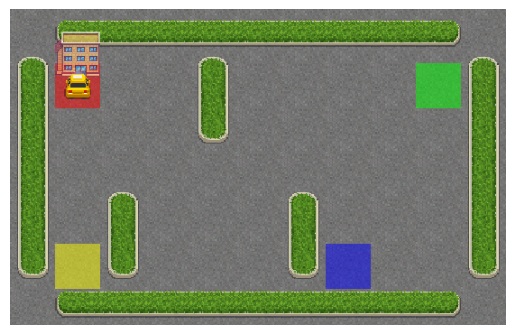

(11, 10)

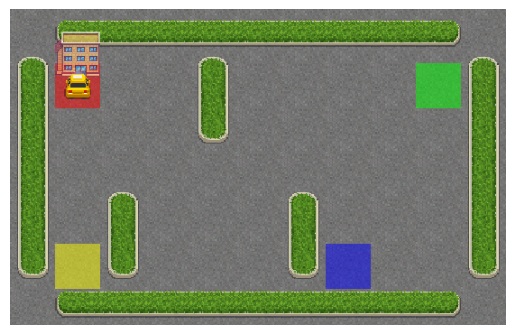

In [12]:
play(env2, q_table_tv3, render=True)

In [13]:
window = 100
average_y_tv3 = []
for ind in range(len(rewards_all_tv3) - window + 1):
    average_y_tv3.append(np.mean(rewards_all_tv3[ind:ind+window]))

for ind in range(window - 1):
    average_y_tv3.insert(0, np.nan)

## SARSA

In [14]:
env2 = gym.make('Taxi-v3')
sarsa_table_tv3, sarsa_rewards_all_tv3 = sarsa(env2, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [15]:
sarsa_table_tv3

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.82520458, -0.92377645, -2.97005417, -2.70970568,  8.67526094,
        -7.58641904],
       [ 0.0410871 ,  0.94944738,  3.76487895, -1.5777312 , 13.59060844,
        -2.07740297],
       ...,
       [-2.08822893,  0.56712794, -2.19655935, -2.15595933, -5.17471814,
        -4.31510731],
       [-3.16253396, -3.1785426 , -3.23635547,  3.28816653, -5.39662453,
        -7.56748779],
       [-0.28981   ,  5.23855629, -0.1       , -0.1       , -1.9099    ,
        -2.7991    ]])

In [16]:
play_multiple_times(env2, sarsa_table_tv3, 1000)

Number of successes: 1000/1000
Average number of steps: 13.046


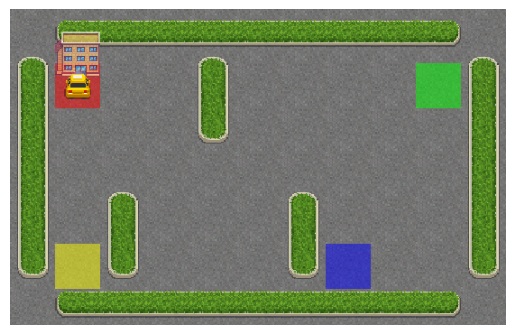

(7, 14)

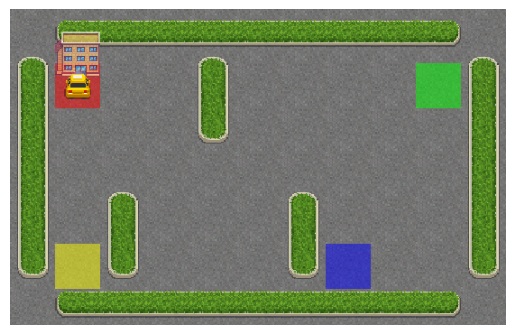

In [17]:
play(env2, sarsa_table_tv3, render=True)

In [18]:
window = 100
sarsa_average_y_tv3 = []
for ind in range(len(sarsa_rewards_all_tv3) - window + 1):
    sarsa_average_y_tv3.append(np.mean(sarsa_rewards_all_tv3[ind:ind+window]))

for ind in range(window - 1):
    sarsa_average_y_tv3.insert(0, np.nan)

# Results and comments

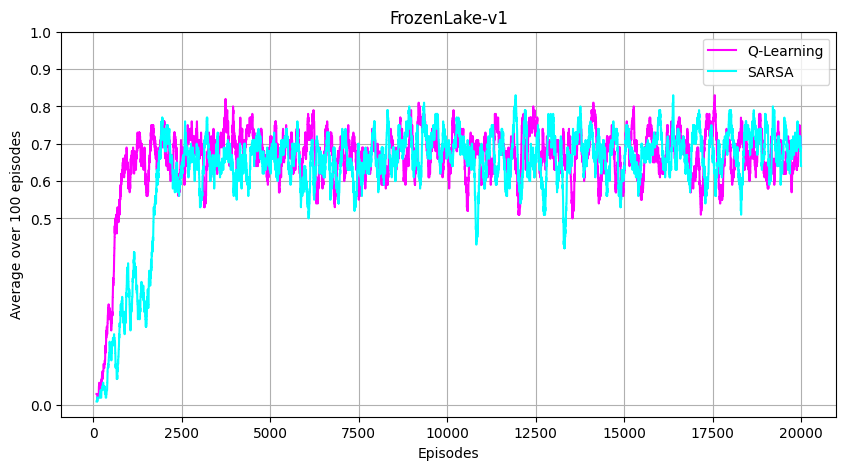

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_flv1)), average_y_flv1, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all_flv1)), sarsa_average_y_flv1, color='cyan', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake-v1')
plt.legend()
plt.show()

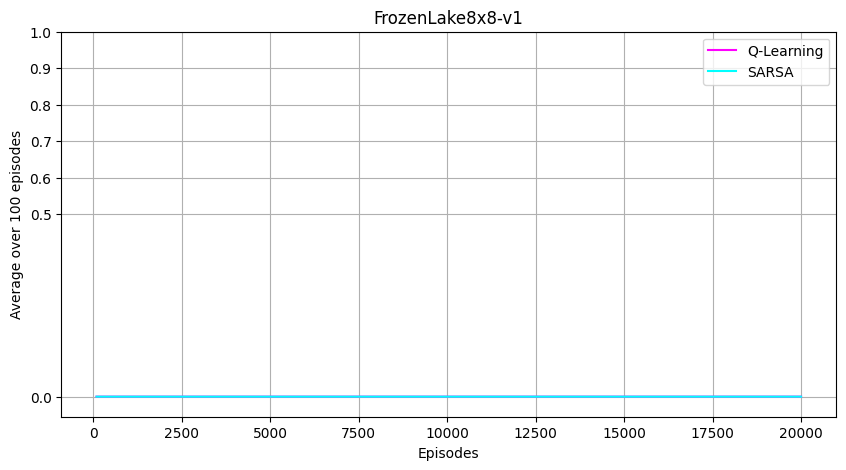

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_fl8v1)), average_y_fl8v1, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all_fl8v1)), sarsa_average_y_fl8v1, color='cyan', label='SARSA')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake8x8-v1')
plt.legend()
plt.show()

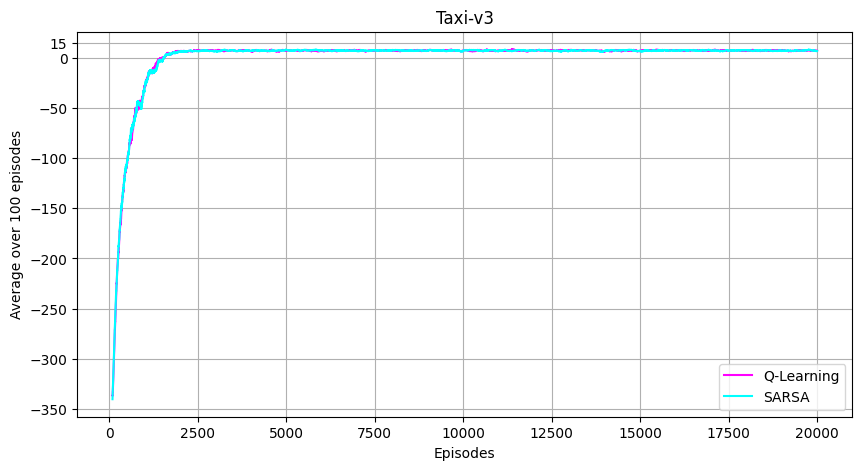

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_tv3)), average_y_tv3, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(sarsa_rewards_all_tv3)), sarsa_average_y_tv3, color='cyan', label='SARSA')
plt.yticks([-350, -300 ,-250,-200,-150,-100,-50, 0, 15])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('Taxi-v3')
plt.legend()
plt.show()

## Comments

Thống kê về kết quả:


In [31]:
import pandas as pd
success = [[753,745],[0,0],[1000,1000]]
average_step = [[39.53120849933599,38.43892617449664],['nan','nan'],[13.105,13.046]]

In [ ]:
df1 = pd.DataFrame(success,index=['FrozenLake-v1','FrozenLake8x8-v1','Taxi-v3'],columns=['Q-LEARNING','SARSA'])

In [32]:
df2 = pd.DataFrame(average_step,index=['FrozenLake-v1','FrozenLake8x8-v1','Taxi-v3'],columns=['Q-LEARNING','SARSA'])

In [ ]:
print('\t Number of successes')
df1

	 Number of successes


,Q-LEARNING,SARSA
FrozenLake-v1,753,745
FrozenLake8x8-v1,0,0
Taxi-v3,1000,1000


In [33]:
print('\t Average number of steps')
df2

	 Average number of steps


,Q-LEARNING,SARSA
FrozenLake-v1,39.531208,38.438926
FrozenLake8x8-v1,nan,nan
Taxi-v3,13.105,13.046


### Đối với trò chơi FrozenLake-v1:
- Có thể dễ dàng thấy Q-Learning có số lần thành công và số bước đi trung bình chênh lệch không quá nhiều so với SARSA.
- Dựa trên biểu đồ thì trong từ 0 đến 2500 episode đầu thì giá trị Q của SARSA thấp hơn thấy rõ so với Q-Learning.
- Nên trong trò chơi này Q-Learning có thể hoạt động tốt hơn SARSA dù các chỉ số chênh nhau không quá lớn.


### Đối với trò chơi FrozenLake8x8-v1:
- Cả 2 thuật toán Q-Learning và SARSA đều không tìm ra được lời giải, với số lần thành công bằng 0.

### Đối với trò chơi Taxi-v3:
- Cả 2 thuật toán Q-Learning và SARSA đều có số lần thành công là 1000/1000 và số bước đi trung bình cũng xấp xỉ bằng nhau.
- Dựa trên biểu đồ, giá trị Q của 2 thuật toán xêm xêm xấp xỉ với nhau.

### Kết luận:
- Chưa thế đánh giá thuật toán nào tốt hơn thuật toán nào vì phụ thuộc khá lớn vào từng môi trường mà 2 thuật toán chạy trên đó.
- SARSA và Q-Learning có thể giải được FrozenLake-v1 bởi vì trò chơi đó chỉ có 4 ô thì lớn nhất sẽ chỉ có 1 ô có hố băng, nên việc tính toán tìm ra chiến lược để tới được kho báu khá dễ nhưng số lần thành công không thể nào tuyệt đối bởi vì ô băng có thể khiến nhân vật trượt đi tới vị trí không mong muốn. Chính lí do này đã làm khó 2 thuật toán trong phiên bản 8x8  của trò chơi để học và tìm ra chiến lược tối ưu vì môi trường ngẫu nhiên, ô băng có thể trượt làm nhân vật di chuyển tới một vị trí khác.
- Về cơ bản SARSA được xây dựng dựa trên Q-Learning nhưng chỉ khác ở một vài điểm là:
    - Q-Learning là một thuật toán off-policy learning (học từ các hành động được thực hiện ngẫu nhiên hay không có trước một chiến lược). Q-Learning chọn chiến lược theo tìm kiếm tham lam (tìm chiến lược có giá trị Q lớn nhất để chọn).
    - SARSA là một thuật toán on-policy learning (học từ các hành động đã được thực hiện trước đó). SARSA chọn chiến lược dựa trên chiến lược hiện tại và cập nhật giá trị của Q.


